 # HOMEWORK 3

# Black holes and accretion disk parameters

1. This part of the assignment is designed as a guide for estimating black hole mass using
scaling relations derived from reverberation mapping studies.
You are given a sample of 500 quasars with a selection of measured spectral parameters
from Shen et al. (2011), including SDSS spectral identification numbers (mjd, plate, fiber)
and full width at half maximum of Hβ line1. Other parameters, like Hβ line luminosity,
bolometric luminosity, black hole masses, and Eddington ratio are provided as a
reference for comparison to the values you calculate yourself. See Shen et al. (2011)
catalog for detailed description of these and other parameters. For the purpose of this
exercise, you are allowed to use only FWHM Hβ for your calculations.

a) To begin, cross-match provided catalog with SDSS to obtain Hβ flux and redshift. Do
some exploratory data analysis of the sample: plot redshift and FWHM distribution of
the sample, plot i-band magnitude vs. redshift, and describe sample limitations in
terms of these plots and parameters (hint: pandas is useful for this).

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the csv file
# given data set of 500 QSOs
import csv
data1 = pd.read_csv('C:/Users/SREEPARNA/Downloads/shen_subsample_500.csv')
data1


,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,W_BHb_,e_W_BHb_,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd
0,189.67804,45.30687,1372,486,53062,-23.20,45.236,0.004,42.35,0.02,4399.3,330.1,62.0,3.1,23.06,8.33,0.07,-1.20
1,189.77188,41.44564,1984,609,53433,-22.29,44.819,0.005,42.11,0.04,2371.4,541.6,89.4,8.7,15.06,7.59,0.20,-0.87
2,189.81419,53.23740,885,449,52379,-22.69,45.121,0.004,41.93,0.04,10756.6,4366.4,32.1,3.4,16.27,9.05,0.35,-2.03
3,189.93733,19.90707,2614,350,54481,-23.37,45.132,0.001,42.55,0.02,15241.3,362.8,118.7,6.3,19.79,9.36,0.02,-2.33
4,189.99405,49.09448,1278,96,52735,-22.77,45.166,0.011,42.25,0.01,1385.6,48.6,52.5,2.9,15.96,7.29,0.03,-0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,231.08040,27.95578,1846,28,54173,-23.33,45.423,0.005,42.56,0.02,9345.2,348.3,60.6,3.4,24.76,9.08,0.03,-1.76
496,231.09229,26.70657,2160,444,53885,-22.72,44.989,0.005,42.19,0.04,4363.7,503.4,73.2,6.8,17.34,8.20,0.10,-1.31
497,231.11946,30.54376,1650,545,53174,-24.56,45.891,0.001,43.14,0.01,2572.5,106.9,76.1,1.9,40.15,8.19,0.04,-0.40
498,231.12225,35.25613,1354,466,52814,-22.60,45.143,0.005,41.80,0.05,1559.7,243.2,21.0,2.7,15.44,7.38,0.14,-0.34


In [2]:
#reading the data from cross matched file obtained by cross matching provided catalog (data1) with SDSS 
data2 = pd.read_csv("C:/Users/SREEPARNA/Downloads/Skyserver_CrossID3_31_2023 12 44 36 PM.csv")
data2

,specobjid,ra,dec,Plate,MJD,Fiber,z,h_beta_flux
0,3.310000e+17,196.80522,-0.600457,294,51986,194,0.170193,1226.00900
1,3.310000e+17,196.98572,1.119352,294,51986,528,0.275446,556.11180
2,3.310000e+17,195.89711,-0.820194,294,51986,260,0.207837,131.78020
3,3.310000e+17,195.60807,-1.086451,294,51986,299,0.234611,66.01272
4,3.360000e+17,203.71013,1.038614,298,51955,577,0.245580,159.38830
...,...,...,...,...,...,...,...,...
495,3.140000e+18,220.06677,20.353934,2789,54555,231,0.204802,155.79820
496,3.140000e+18,224.66841,19.871848,2791,54556,520,0.222684,973.65030
497,3.140000e+18,227.30750,17.952793,2792,54556,89,0.170544,1935.62300
498,3.320000e+18,220.11897,63.512978,2947,54533,473,0.284733,54.41901


In [3]:
#merging both the data sets based on plate, mjd, fiberid
merged_data = pd.merge(data1, data2, on=['Plate', 'MJD', 'Fiber'])
merged_data

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd,specobjid,ra,dec,z,h_beta_flux
0,189.67804,45.30687,1372,486,53062,-23.20,45.236,0.004,42.35,0.02,...,3.1,23.06,8.33,0.07,-1.20,1.540000e+18,189.67803,45.306863,0.228846,323.90260
1,189.77188,41.44564,1984,609,53433,-22.29,44.819,0.005,42.11,0.04,...,8.7,15.06,7.59,0.20,-0.87,2.230000e+18,189.77188,41.445637,0.178252,448.13070
2,189.81419,53.23740,885,449,52379,-22.69,45.121,0.004,41.93,0.04,...,3.4,16.27,9.05,0.35,-2.03,9.970000e+17,189.81417,53.237400,0.201624,86.80108
3,189.93733,19.90707,2614,350,54481,-23.37,45.132,0.001,42.55,0.02,...,6.3,19.79,9.36,0.02,-2.33,2.940000e+18,189.93734,19.907090,0.239360,370.09130
4,189.99405,49.09448,1278,96,52735,-22.77,45.166,0.011,42.25,0.01,...,2.9,15.96,7.29,0.03,-0.23,1.440000e+18,189.99405,49.094498,0.235311,589.24180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,231.08040,27.95578,1846,28,54173,-23.33,45.423,0.005,42.56,0.02,...,3.4,24.76,9.08,0.03,-1.76,2.080000e+18,231.08041,27.955782,0.284370,118.15860
496,231.09229,26.70657,2160,444,53885,-22.72,44.989,0.005,42.19,0.04,...,6.8,17.34,8.20,0.10,-1.31,2.430000e+18,231.09229,26.706561,0.236137,324.73740
497,231.11946,30.54376,1650,545,53174,-24.56,45.891,0.001,43.14,0.01,...,1.9,40.15,8.19,0.04,-0.40,1.860000e+18,231.11947,30.543761,0.273973,2162.26000
498,231.12225,35.25613,1354,466,52814,-22.60,45.143,0.005,41.80,0.05,...,2.7,15.44,7.38,0.14,-0.34,1.520000e+18,231.12225,35.256130,0.249451,252.49410


In [4]:
#exporting the merged dataframe to a new csv file
#merged_data.to_csv('merged_file.csv', index=False)


#  Data Analysis

In [5]:
#extract redshift, imag and FWHM from data
redshift = merged_data['z']              # a measure of distance
FWHM = merged_data['W_BHb_']
imag = merged_data['iMAG']              # absolute i-band magnitude-a measure of brightness

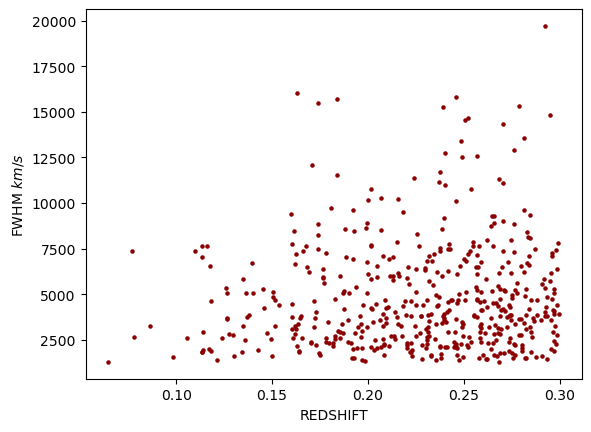

In [6]:
# Plot redshift and FWHM distribution of the sample

plt.xlabel('REDSHIFT')
plt.ylabel('FWHM $km/s$')
plt.scatter(redshift, FWHM, color='darkred', s=5)


We see here that full width half maxima (FWHM) has a low positive correlation with redshift. 

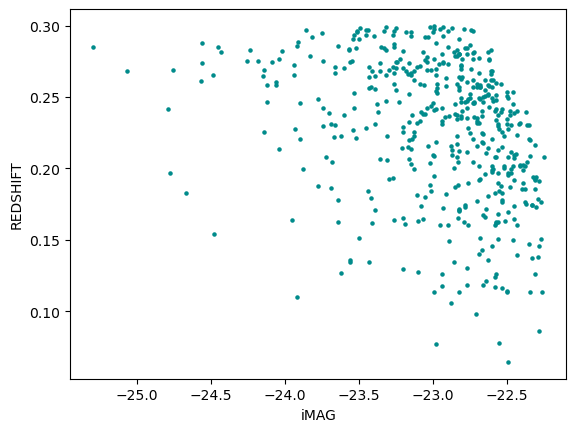

In [7]:
#plot i-band magnitude vs. redshift
plt.xlabel('iMAG')
plt.ylabel('REDSHIFT')
plt.scatter(imag, redshift, color='darkcyan', s=5)


Here we see a weak negative correlation between iMAG and redshift.

Limitations:
From the above scatter plots we see that there is a low correlation between redshift and iMAG or FWHM. This might be because of the sample limitations. The limitating factors could be the small sample size, some bias in selection method, or  errors in measurement of redshift, FWHM, or i-band magnitude. As mentioned in the paper of Shen et al. 2011 paper; https://ui.adsabs.harvard.edu/abs/2011ApJS..194...45S/abstract ,from where the sample has been collected (Shen catalog Shen et al. 2011 catalog; https://vizier.cds.unistra.fr/viz-bin/VizieR-3), some other limiting factors might be flux-limited sample and host contamination.

# Calculate the luminosity of the Hβ emission line

b) Next, using the provided FWHM and SDSS data, find:

i) The luminosity of the Hβ emission line. For this, you will need to calculate the
luminosity distance for each object using formulas given by Hogg (2000). For
cosmological constants, use ones from Planck (H0=67.8 km/s MPc, Ωm=0.31,
Ωλ=0.69). Using luminosity distance, Hβ flux and redshift, find the luminosity of
the Hβ emission line.

Hogg 2000; https://arxiv.org/abs/astro-ph/9905116

In [8]:
#calculate luminosity distance using astropy.cosmology module

from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.units import imperial


In [9]:
L_D = cosmo.luminosity_distance(merged_data['z'])  
L_D   # luminosity distance in units of Mpc
#max(L_D)
# 1Mpc = 3.0857e24 cm

0      1153.894238
1       872.310615
2      1000.660739
3      1214.126537
4      1190.859435
          ...     
495    1478.406137
496    1195.603814
497    1416.449697
498    1272.482203
499     666.382543
Name: z, Length: 500, dtype: float64

In [10]:
#making it dimensionless so that I can change into other units
L_D = L_D/u.Mpc
#max(L_D)

In [11]:
# extracting h-beta flux in units of 10e-17 ergs/s/cm**2
H_beta_flux = merged_data['h_beta_flux']

In [12]:
#calculating luminosity of H-beta lines in units of ergs/s
L_H_beta = (4*np.pi*((L_D * 3.0857e24)**2)*(merged_data['h_beta_flux'] * 1e-17))/(1+ merged_data['z'])
L_H_beta
#max(L_H_beta)
# formula used: from Hogg eqn 24

0      4.199196e+41
1      3.462789e+41
2      8.654610e+40
3      5.266919e+41
4      8.093860e+41
           ...     
495    2.405913e+41
496    4.493217e+41
497    4.074435e+42
498    3.915188e+41
499    7.943893e+40
Length: 500, dtype: float64

In [13]:
#a=L_H_beta[300].to_value()

In [14]:
#a=[]
#for i in range(len(L_H_beta)):
 #   LHb= L_H_beta[i].to_value()
  #  #print(type(LHb))
# a.append(LHb)

In [15]:
# taking log of luminosity of H-beta lines
l_LHB = np.log10(L_H_beta)
l_LHB

0      41.623166
1      41.539426
2      40.937247
3      41.721557
4      41.908156
         ...    
495    41.381280
496    41.652557
497    42.610067
498    41.592753
499    40.900033
Length: 500, dtype: float64

# Calculating Black Hole mass

ii) Using the empirical relation from Section 3 in Wu (2009), calculate black hole mass
using the luminosity of the Hβ line and FWHM Hβ. You should elaborate on the
assumption you have to make to use this relation.

Wu 2009; http://adsabs.harvard.edu/abs/2009MNRAS.398.1905W

In [16]:
# formula used from Pg-5 of Wu (2009) paper

Mass = (2.4e6) * (L_H_beta/1e42)**0.59 * (FWHM/1e3)**2 #1.989e30
Mass     # black hole mass

#in units of solar mass
# Solar mass = 1.989 x 10^30 kg
# unit of fwhm is km/s

0      2.783854e+07
1      7.219087e+06
2      6.554466e+07
3      3.819211e+08
4      4.067231e+06
           ...     
495    9.043647e+07
496    2.850558e+07
497    3.637992e+07
498    3.357511e+06
499    2.440074e+07
Length: 500, dtype: float64

In [17]:
# calculating logarithmic value of black hole mass

l_mass = np.log10(Mass)
l_mass
#max(l_mass)

0      7.444646
1      6.858482
2      7.816537
3      8.581974
4      6.609299
         ...   
495    7.956344
496    7.454930
497    7.560862
498    6.526017
499    7.387403
Length: 500, dtype: float64

Assumptions for using the above formula:
The H-beta luminosity used here arises from broad line region(BLR) and the gas in the BLR surrounding the black hole is virialised which allowes us to use the virial theorem to estimate the BH mass.
M_(bh) = R_(BLR)V^2G^-1
where V can be estimated from the FWHM of the broad emission lines (V = fVFWHM) by assuming the gas to be in Keplerian motion. f =√3/2  if we assume an isotropic distribution of the BLR clouds (e.g., Wandel et al. 1999;Kaspi et al. 2000), G is gravitational constant and R is the radius(size) of the BLR cloud. So the gas is moving in a random, isotropic manner under gravitational influence of BH.

#  Eddington luminosity and ratio

iii) Estimate the Eddington luminosity and Eddington ratio after having derived the
bolometric luminosity (e.g., use empirical relations from Wu 2009)

In [18]:
# calculating bolometric luminosity in units of ergs/s
# Formula used: L_bol=10L_blr and L_blr=25.26L_H_beta

L_bol = 10 * 25.26 * L_H_beta    
L_bol  
#L_bol = 10 ** (0.94 + (0.03*l_LHB) + 5.39 + 1.14)
#max(L_bol)
# formula used from Pg-6 of Wu (2009) paper

0      1.060717e+44
1      8.747006e+43
2      2.186154e+43
3      1.330424e+44
4      2.044509e+44
           ...     
495    6.077336e+43
496    1.134987e+44
497    1.029202e+45
498    9.889764e+43
499    2.006627e+43
Length: 500, dtype: float64

In [19]:
l_L_bol = np.log10(L_bol)
l_L_bol

0      44.025599
1      43.941859
2      43.339681
3      44.123990
4      44.310589
         ...    
495    43.783713
496    44.054991
497    45.012501
498    43.995186
499    43.302467
Length: 500, dtype: float64

In [20]:
# calculating eddington luminosity
L_edd = 1.38e38 * Mass
L_edd
#max(L_edd)
# formula used from pg-6 of Wu 2009

0      3.841718e+45
1      9.962340e+44
2      9.045163e+45
3      5.270512e+46
4      5.612779e+44
           ...     
495    1.248023e+46
496    3.933770e+45
497    5.020429e+45
498    4.633365e+44
499    3.367302e+45
Length: 500, dtype: float64

In [21]:
# calculating eddington ratio
Edd_ratio = L_bol/L_edd
Edd_ratio
#max(Edd_ratio)

#dimensionless

0      0.027610
1      0.087801
2      0.002417
3      0.002524
4      0.364260
         ...   
495    0.004870
496    0.028852
497    0.205003
498    0.213447
499    0.005959
Length: 500, dtype: float64

In [22]:
l_edd_r = np.log10(Edd_ratio)
l_edd_r

0     -1.558926
1     -1.056502
2     -2.616736
3     -2.597863
4     -0.438589
         ...   
495   -2.312509
496   -1.539818
497   -0.688240
498   -0.670711
499   -2.224815
Length: 500, dtype: float64

#  Analysis

c) How would you describe these AGNs based on the properties you found? Provide
histograms of obtained black hole masses and Eddington ratios. Present your results as
in Figure 2 from Wu (2009), and Figure 7 from McLure & Dunlop (2002), or on any plots
that you find appropriate to illustrate your conclusions. Optionally, you can compare
your values to values from Shen et al. (2011).

In [23]:
# plot of H beta luminosity vs bolometric luminosity

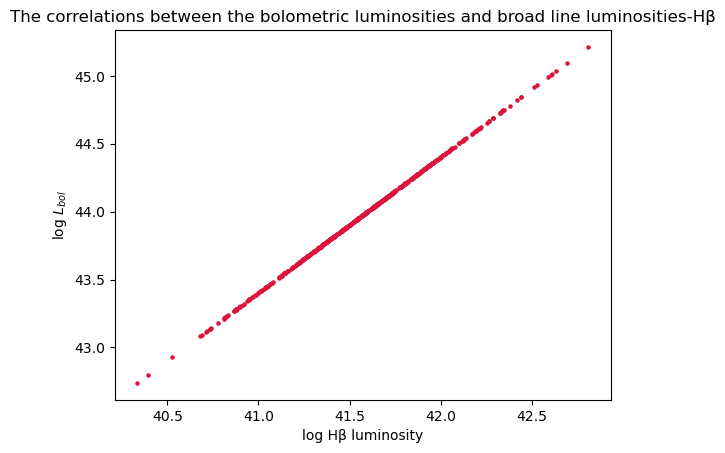

In [24]:
plt.scatter(l_LHB, l_L_bol, color='crimson', s=5)
plt.title('The correlations between the bolometric luminosities and broad line luminosities-Hβ')
plt.xlabel('log H\u03B2 luminosity')
plt.ylabel('log $L_{bol}$')
plt.show()


In [25]:
# plotting of black hole mass vs eddington ratio

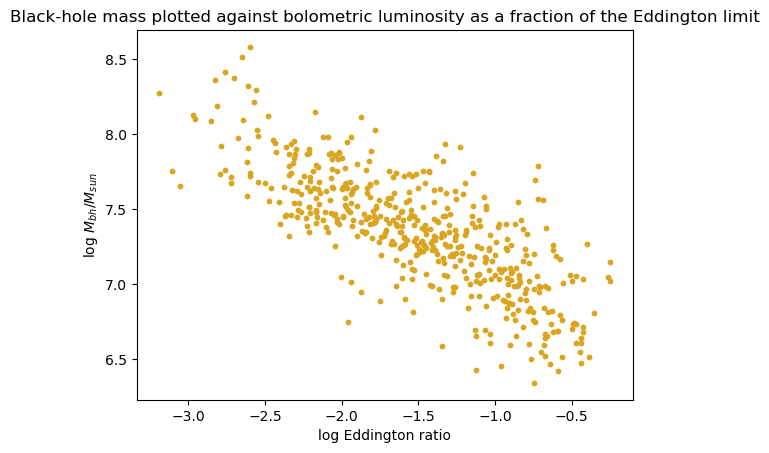

In [26]:
plt.scatter(l_edd_r, l_mass, color='goldenrod', s=10 )
plt.title('Black-hole mass plotted against bolometric luminosity as a fraction of the Eddington limit')
plt.xlabel('log Eddington ratio')
plt.ylabel('log $M_{bh}/M_{sun}$')
plt.show()


Doubt: In the links given below the plot of black hole mass against Eddington ratio is similar to what I have obtained here, i.e, negative slope whereas in the paper of McLure and Dunlop 2002 it has a positive slope.

https://iopscience.iop.org/article/10.3847/1538-4357/aabe2a/pdf 
    
https://www.researchgate.net/figure/Eddington-ratio-vs-black-hole-mass-left-and-redshift-right-Symbols-indicate_fig5_230964558

In [27]:
# plotting of redshift vs eddington ratio

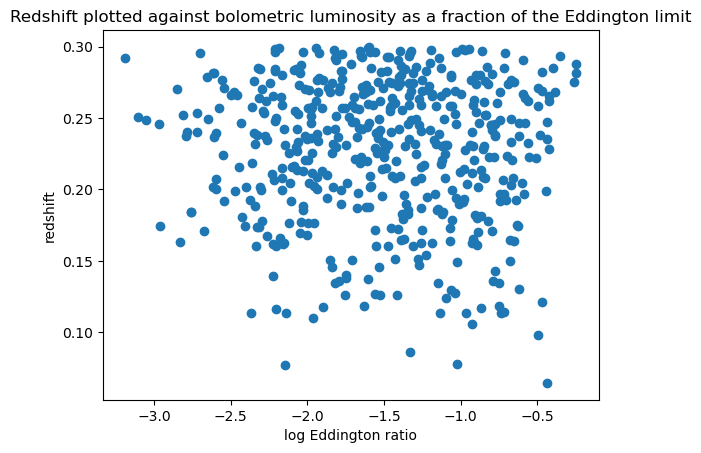

In [28]:
plt.scatter(l_edd_r,redshift )
plt.title('Redshift plotted against bolometric luminosity as a fraction of the Eddington limit')
plt.ylabel('redshift')
plt.xlabel('log Eddington ratio')
plt.show()


In [29]:
# plotting of the histogram distribution of the black hole masses.

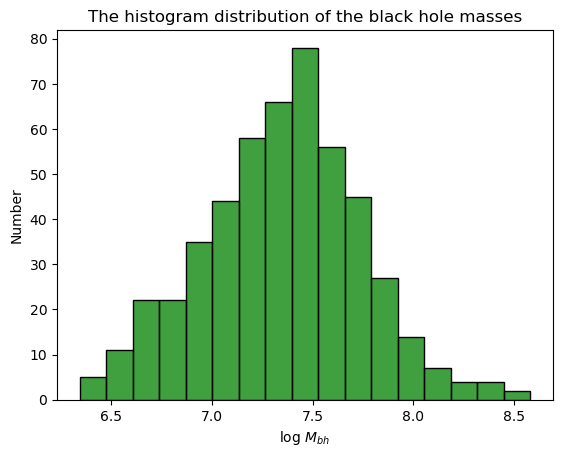

In [30]:
sns.histplot(l_mass, color='green')
plt.xlabel('log $M_{bh}$')
plt.ylabel('Number')
plt.title('The histogram distribution of the black hole masses')
plt.show()

In [31]:
# plotting of the histogram distribution of the Eddington ratios.

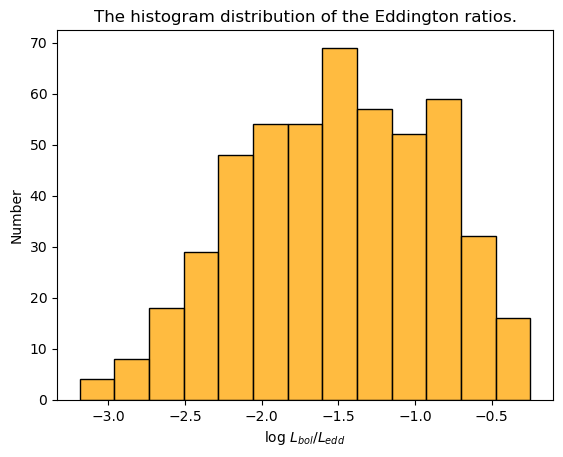

In [32]:
sns.histplot(l_edd_r, color='orange')
plt.xlabel('log $L_{bol}/L_{edd}$')
plt.ylabel('Number')
plt.title('The histogram distribution of the Eddington ratios.')
plt.show()

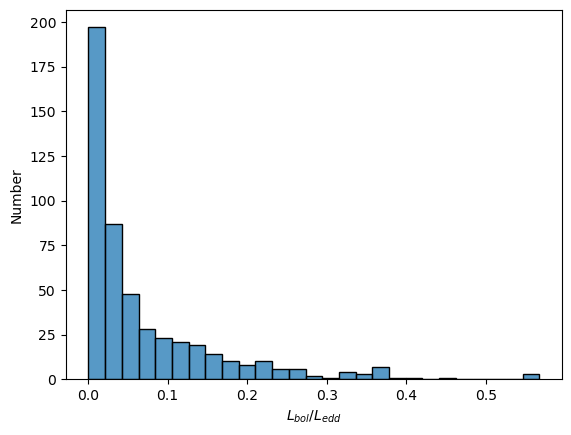

In [33]:
sns.histplot(Edd_ratio)
plt.xlabel('$L_{bol}/L_{edd}$')
plt.ylabel('Number')
#plt.title('The histogram distribution of the Eddington ratios.')
plt.show()

# Black hole mass from galactic host bulge luminosity

2. In this part of the assignment you will learn how to estimate black hole mass from
galactic host bulge luminosity. It is useful in cases when you don’t have spectroscopic
data for broad emission lines.



Calculate black hole mass for at least 10 objects from Wu (2009) using the relation
between black hole mass and host galaxy absolute magnitude in the R band given in Wu
(2009) and proposed by McLure & Dunlop (2002). Elaborate on the assumptions you have
to make in order to use this relation. You will need to obtain magnitudes in JohnsonCousins photometric system (e.g., you can try searching the NED database). Additionally,
find the Eddington ratio and plot it against obtained black hole masses. Optionally, you
can plot your black hole mass and Eddington ratio estimates against ones from Wu et al.
(2009) and discuss what you find.


In [34]:
# reading the file containing the values of absolute magnitude in R band for 10 objects
df = pd.read_csv('C:/Users/SREEPARNA/OneDrive/Documents/Magnitude.csv')
df

#the last two colums in the data below are taken from Wu (2009) for comparison later

,Source,R-band Magnitude,Database,log(M_bh/M_sun),log Edd ratio
0,3C 48,15.555,NED,8.8,-0.30
1,3C 459,17.950,NED,8.5,NaN
2,3C 346,16.730,NED,8.8,-2.54
3,3C 303.1,17.910,NED,8.4,NaN
4,3C 293,13.590,NED,8.0,-1.78
5,3C 268.3,19.580,NED,7.8,NaN
6,3C 213.1,18.390,NED,9.1,-0.42
7,PKS 1549-79,17.480,Simbad,8.0,-0.32
8,PKS 2004-447,18.000,Simbad,7.6,-0.26
9,4C 12.5,15.200,NED,7.8,NaN


In [35]:
# extracting the values of R band magnitude
R_mag = df['R-band Magnitude']   

In [36]:
# calculating BH mass 
# Formula used: log10(Mbh/M⊙) = −0.5MR − 2.74
# value of MR should always be taken negative (more negative the value brighter the object)
# from Wu (2009) pg-5 eqn-7

Assumption for using this formula:
Firstly, it's assumed that there is a correlation between the BH mass and properties of its host galaxy. Also, the relation derived by Wu has been done for a particular sample of BH and galaxies and might not be applicable to all other samples.

In [37]:
mass1 = 10**((-0.5*(-R_mag)) - 2.74)
mass1

#taking antilog to calculate value of mass in terms of solar mass from above formula

0    1.090184e+05
1    1.717908e+06
2    4.216965e+05
3    1.640590e+06
4    1.135011e+04
5    1.122018e+07
6    2.851018e+06
7    1.000000e+06
8    1.819701e+06
9    7.244360e+04
Name: R-band Magnitude, dtype: float64

In [38]:
# calculating log value of the ratio of masses
#l_mass1 = np.log10(mass1)
#l_mass1
l_mass1 = (-0.5*-R_mag) - 2.74
l_mass1

0    5.0375
1    6.2350
2    5.6250
3    6.2150
4    4.0550
5    7.0500
6    6.4550
7    6.0000
8    6.2600
9    4.8600
Name: R-band Magnitude, dtype: float64

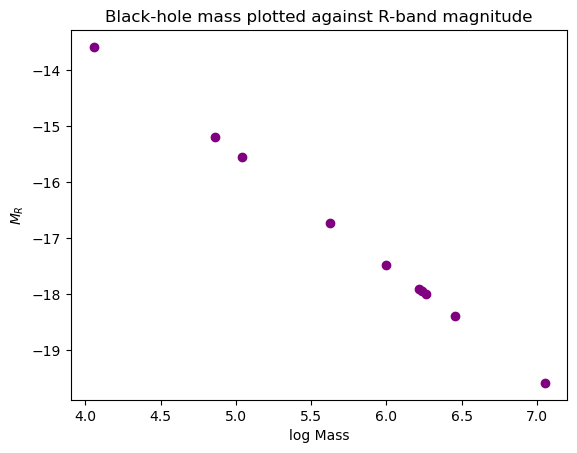

In [39]:
plt.scatter(l_mass1, -R_mag, color='purple')
plt.title('Black-hole mass plotted against R-band magnitude')
plt.ylabel('$M_{R}$')
plt.xlabel('log Mass')
plt.show()

In [40]:
#calculating log of eddington ratio
# Formula used: log Mbh = 2.79(±0.37) log(Lbol/Ledd) − 10.29(±0.28)
#here log Mbh basically means log(Mbh/M_sun) otherwise we get wrong values
# from pg-9 eqn-10 of  McLure & Dunlop (2002) paper

l_edd_r1 = (l_mass1 + (10.29*-0.28))/(2.79*-0.37)      #taking the lower limit(-ve values)
l_edd_r1

0   -2.088831
1   -3.248862
2   -2.657948
3   -3.229488
4   -1.137073
5   -4.038361
6   -3.461978
7   -3.021215
8   -3.273080
9   -1.916885
Name: R-band Magnitude, dtype: float64

In [41]:
# calculating eddington luminosity
L_edd1 = 1.38e38 * mass1
L_edd1

0    1.504455e+43
1    2.370714e+44
2    5.819412e+43
3    2.264014e+44
4    1.566315e+42
5    1.548385e+45
6    3.934405e+44
7    1.380000e+44
8    2.511187e+44
9    9.997216e+42
Name: R-band Magnitude, dtype: float64

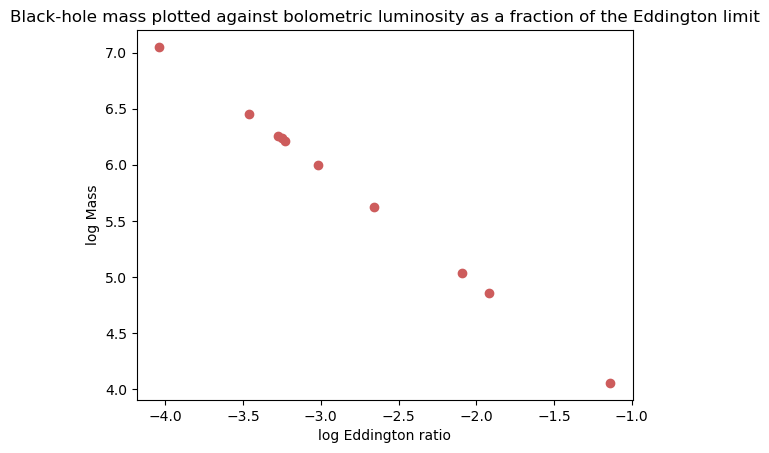

In [46]:
plt.scatter(l_edd_r1,l_mass1, color='indianred')
plt.title('Black-hole mass plotted against bolometric luminosity as a fraction of the Eddington limit')
plt.xlabel('log Eddington ratio')
plt.ylabel('log Mass')
plt.show()

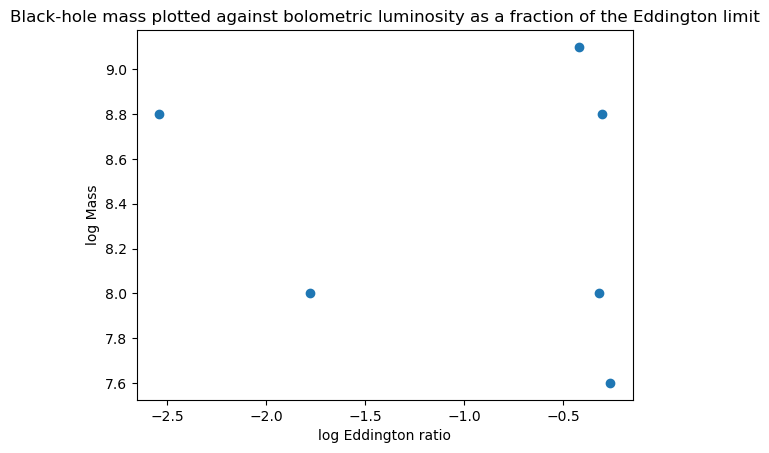

In [43]:
#comparison: by using values from Wu
Mass_Wu = df['log(M_bh/M_sun)']
Edd_Wu = df['log Edd ratio']

plt.scatter(Edd_Wu,Mass_Wu )
plt.title('Black-hole mass plotted against bolometric luminosity as a fraction of the Eddington limit')
plt.xlabel('log Eddington ratio')
plt.ylabel('log Mass')
plt.show()

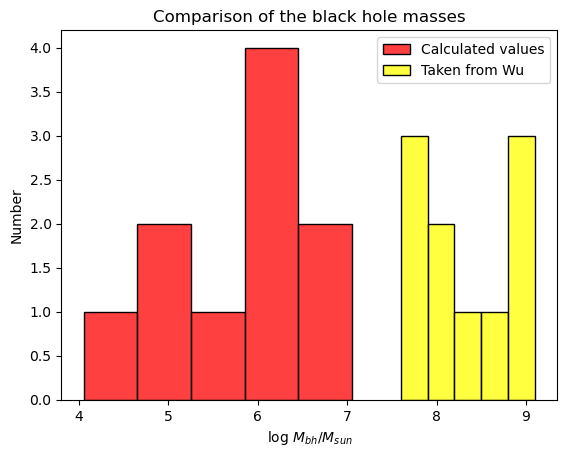

In [44]:
sns.histplot(l_mass1, color='red', label='Calculated values')
sns.histplot(Mass_Wu, color='yellow', label='Taken from Wu')
plt.xlabel('log $M_{bh}/M_{sun}$')
plt.ylabel('Number')
plt.title('Comparison of the black hole masses')
plt.legend()
plt.show()

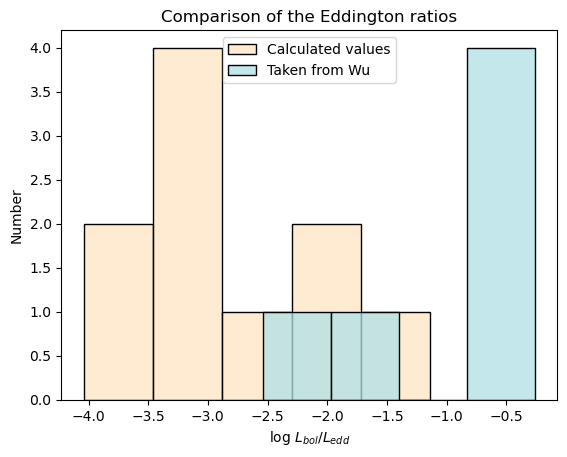

In [45]:
sns.histplot(l_edd_r1, color='bisque', label='Calculated values')
sns.histplot(Edd_Wu, color='powderblue', label='Taken from Wu')
plt.xlabel('log $L_{bol}/L_{edd}$')
plt.ylabel('Number')
plt.title('Comparison of the Eddington ratios')
plt.legend()
plt.show()

From the above two histograms we see that the values calculated here are almost similar to the values given in Wu. 